# Исследование заведений общественного питания Москвы

### Цели и задачи проекта

**Цель:** Провести исследовательский анализ заведений общественного питания в Москве для определения наилучшего места для заведения.

**Задачи:**
1. Загрузить данные и познакомиться с ними.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных.
4. Сформулировать выводы по проведенному анализу.

### Описание данных

Данные о заведениях общественного питания Москвы состоят из двух датасетов:
- `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания.
- `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания.

#### Описание датасета `/datasets/rest_info.csv`

- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    - `0` — заведение не является сетевым;
    - `1` — заведение является сетевым.
- `seats` — количество посадочных мест.

#### Описание датасета `/datasets/rest_price.csv`
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    - «Средний счёт: 1000–1500 ₽»;
    - «Цена чашки капучино: 130–220 ₽»;
    - «Цена бокала пива: 400–600 ₽».
       и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
    - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.


### Содержимое проекта

В данном проекте проведен исследовательский ананлиз данных заведений общественного питания города Москвы для определения факторов, которые помогут определить оптимальное место, вид и других факторов для открытия заведения.
Проект состоит из четырех основных частей:
1. Загрузка данных и знакомство с ними
2. Предобработка данных
3. Исследовательский анализ данных
4. Итоговые выводы


## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

In [ ]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [ ]:
# Загружаем датасеты 'rest_info.csv' и 'rest_price.csv'
df_info = pd.read_csv('/datasets/rest_info.csv')
df_price = pd.read_csv('/datasets/rest_price.csv')

In [ ]:
# Выведем первые 5 строк датасета 'rest_info.csv'
df_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [ ]:
# Выведем информацию о датасете 'rest_info.csv'
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [ ]:
# Выведем первые 5 строк датасета 'rest_price.csv'
df_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [ ]:
# Выведем информацию о датасете 'rest_price.csv'
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


**Датасет 'rest_info.csv' содержит 8406 строк и 9 колонок**
- Также можно в колонке 'chain' оптимизировать размерность данных, так как возможные значения, которые она может содержать это 0 и 1
- В колонках 'hours' и 'seats' содержатся пропуски
- Данные соответсвуют описанию

**Датасет 'rest_price.csv' содержит 4058 строк и 6 колонок**
- Каждая колонка содержит корректный тип данных
- Пропуски содержатся в столбцах 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup', но пропуски в столбцах 'middle_avg_bill' и 'middle_coffee_cup' обоснованы описанием датасета, а значит надо будет уделить внимание пропускам 'price'и 'avg_bill'
- Данные соответсвуют описанию

### Подготовка единого датафрейма

In [ ]:
# Объединим данные двух датасетов в один
df_merged = df_info.merge(df_price, on='id', how='left')

In [ ]:
# Выведем информацию об объеденненом датафрейме, чтобы проверить правильность объединненых данных
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


## 2. Предобработка данных


In [ ]:
# Преобразуем тип данных в колонке 'chain' к типу данных int8
df_merged['chain'] = pd.to_numeric(df_merged['chain'], downcast = 'integer')

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int8(1), object(8)
memory usage: 861.9+ KB


In [ ]:
# Посчитаем количество пропусков в каждом столбце
df_merged.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [ ]:
# Посчитаем процентов пропусков каждом столбце
(df_merged.isna().sum()/df_merged['id'].count()).sort_values()*100

id                    0.000000
name                  0.000000
category              0.000000
address               0.000000
district              0.000000
rating                0.000000
chain                 0.000000
hours                 6.376398
seats                42.957411
avg_bill             54.603854
price                60.563883
middle_avg_bill      62.538663
middle_coffee_cup    93.635498
dtype: float64

- Пропуски в столбце `hours` занимают около 6%, и так как в дальнейшем анализе они практически не будут участвовать, а значит их можно игнорировать
- Пропуски в столбце `seats`, `price` занимают занчительную часть 42% и 60% соответственно, так как данные берутся из открытых источников они могут содержать ошибки, тем самым пропуски в данных столбцах можно отнести к типу MСAR
- Пропуски в столбце `avg_bill` занимают значительную часть 54%, и влияют на количество пропусков в столбцах `middle_avg_bill`, `middle_coffee_cup` их стоит оставить
- В столбцах `middle_avg_bill`, `middle_coffee_cup` пропуски обоснованы описанием данных

In [ ]:
# Удалим данные в столбце 'hours'
df_merged = df_merged.dropna(subset=['hours'])
df_merged.isna().sum().sort_values()

id                      0
name                    0
category                0
address                 0
district                0
hours                   0
rating                  0
chain                   0
seats                3375
avg_bill             4062
price                4560
middle_avg_bill      4727
middle_coffee_cup    7336
dtype: int64

Столбцы `price`, `avg_bill`, `seats` пока проигнорируем

In [ ]:
df_merged['name'].str.lower()
df_merged['address'].str.lower()
df_merged['district'].str.lower()

0            северный административный округ
1            северный административный округ
2            северный административный округ
3            северный административный округ
4            северный административный округ
                        ...                 
8401     юго-западный административный округ
8402            южный административный округ
8403    юго-восточный административный округ
8404    юго-восточный административный округ
8405            южный административный округ
Name: district, Length: 7870, dtype: object

In [ ]:
# Проверим данные на наличие дубликатов
df_merged.duplicated().sum()

0

In [ ]:
# Проверим уникальные занчения в столбце 'price'
unique_values_p = df_merged['price'].unique()
unique_values_p

array([nan, 'выше среднего', 'средние', 'высокие', 'низкие'], dtype=object)

In [ ]:
# создадим функцию create_col, которая присваевает значение True или false в зависимостии от режима работы заведения
def create_col(x):
    if x == 'ежедневно, круглосуточно':
        return True
    else:
        return False

In [ ]:
# создадим новый столбец is_24_7
df_merged['is_24_7'] = df_merged['hours'].apply(create_col)
df_merged.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False


---

### Промежуточный вывод


В результате работы над данным этапом:
1. Были объеденены датафреймы `/datasets/rest_info.csv` и `/datasets/rest_price.csv`
2. Преобразован тип данных в колонке `chain` к типу данных `int8`
3. В столбце `hours` были удалены пропуски
5. В столбце `price`, `seats`, `avg_bill` пропуски были оставлены
6. Дубликаты найдены не были
7. Был создан новый столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно

## 3. Исследовательский анализ данных


---

### Задача 1

Какие категории заведений представлены в данных?

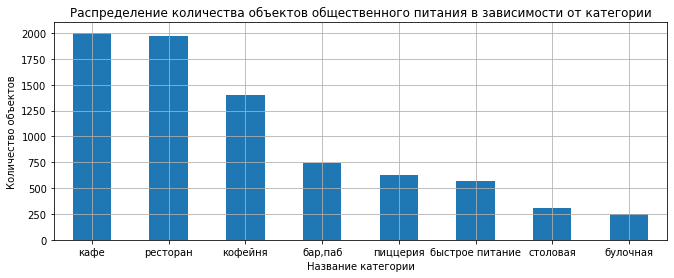

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(11, 4))

# Строим столбчатую диаграмму
df_merged['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение количества объектов общественного питания в зависимости от категории'
)

# Настраиваем оформление графика
plt.xlabel('Название категории')
plt.ylabel('Количество объектов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

In [ ]:
tab_1 = df_merged['category'].value_counts()
tab_1_percent = df_merged['category'].value_counts(normalize=True) * 100
tab_1 = pd.DataFrame({'Количество': tab_1, 'Процент': tab_1_percent})
print('Распределение количества объектов общественного питания в зависимости от категории')

tab_1


Распределение количества объектов общественного питания в зависимости от категории


,Количество,Процент
кафе,2003,25.451080
ресторан,1969,25.019060
кофейня,1398,17.763659
"бар,паб",747,9.491741
пиццерия,628,7.979670
быстрое питание,570,7.242694
столовая,306,3.888183
булочная,249,3.163914


- Ресторан и кафе - самые популярные категории по наличию заведений, количество которых составляет около 2000
- Булочная и столовая - самые непопулярные категории, количество заведений составляет около 250

---

### Задача 2

Какие административные районы Москвы присутствуют в данных?

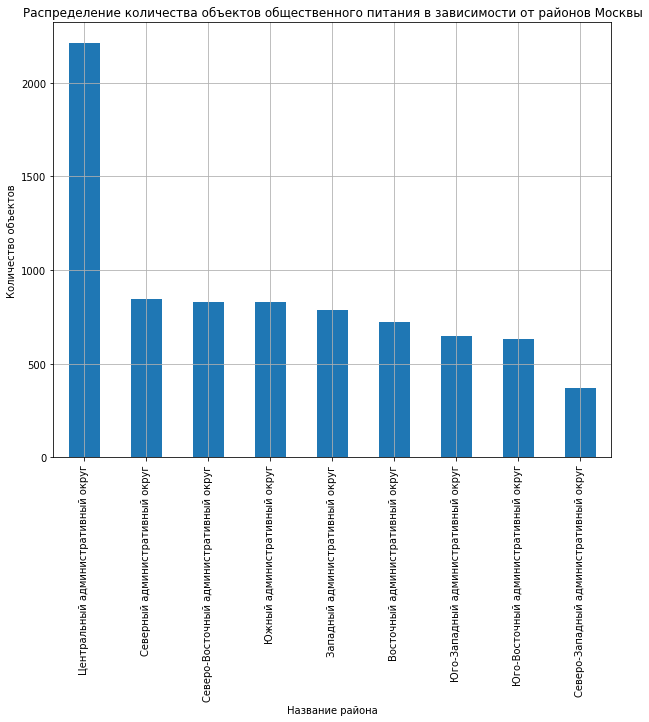

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 8))

# Строим столбчатую диаграмму
df_merged['district'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=90, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение количества объектов общественного питания в зависимости от районов Москвы'
)

# Настраиваем оформление графика
plt.xlabel('Название района')
plt.ylabel('Количество объектов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

In [ ]:
tab_2 = df_merged['district'].value_counts()
tab_2_percent = df_merged['district'].value_counts(normalize=True)*100
tab_2 = pd.DataFrame({'Количество': tab_2, 'Процент': tab_2_percent})
print('Распределение количества объектов общественного питания в зависимости от районов Москвы')
tab_2

Распределение количества объектов общественного питания в зависимости от районов Москвы


,Количество,Процент
Центральный административный округ,2211,28.094028
Северный административный округ,846,10.749682
Северо-Восточный административный округ,830,10.546379
Южный административный округ,827,10.508259
Западный административный округ,785,9.974587
Восточный административный округ,723,9.186785
Юго-Западный административный округ,650,8.259212
Юго-Восточный административный округ,629,7.992376
Северо-Западный административный округ,369,4.688691


- Центральный административный округ выделяется среди других районов Москвы, количество заведений в котором составляет более 2000, пока в остальных районах находится от 629 до 846.
- Северо-Западный административный округ является самым непопулярным районом - количество заведений достигает около 370

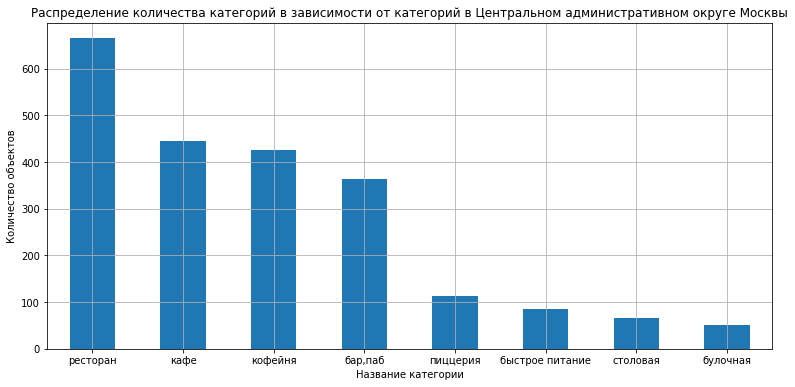

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(13, 6))
df_filtered_dis = df_merged.loc[df_merged['district'] == 'Центральный административный округ']
# Строим столбчатую диаграмму
df_filtered_dis['category'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение количества категорий в зависимости от категорий в Центральном административном округе Москвы'
)

# Настраиваем оформление графика
plt.xlabel('Название категории')
plt.ylabel('Количество объектов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

In [ ]:
tab_3 = df_filtered_dis['category'].value_counts()
tab_3_percent = df_filtered_dis['category'].value_counts(normalize=True)*100
tab_3 = pd.DataFrame({'Количество': tab_3, 'Процент': tab_3_percent})
print('Распределение количества категорий в зависимости от категорий в Центральном административном округе Москвы')
tab_3

Распределение количества категорий в зависимости от категорий в Центральном административном округе Москвы


,Количество,Процент
ресторан,665,30.076888
кафе,444,20.081411
кофейня,426,19.267300
"бар,паб",364,16.463139
пиццерия,112,5.065581
быстрое питание,85,3.844414
столовая,65,2.939846
булочная,50,2.261420


- В центральном административном округе самая популярная категория это `ресторан`(количество заведений около 660)
- Самые непопулярные категории это `быстрое питание`, `столовая`, `булочная` (количество не превышает 90)

---

### Задача 3
Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми?

In [ ]:
# создадим функцию create_col, которая присваевает значение True или false в зависимостии от режима работы заведения
def create_col_s(x):
    if x > 1:
        return True
    else:
        return False

In [ ]:
df_merged['name'].str.lower()
new_df = df_merged['name'].value_counts().reset_index()
new_df.columns = ['name', 'count']
# Объединяем с df_merged
df_merged = df_merged.merge(new_df, on='name', how='left')

In [ ]:
# Создаем столбец chain_rest
df_merged['chain_rest'] = df_merged['count'].apply(create_col_s)

In [ ]:
df_merged.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7,count,chain_rest
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,False,1,False
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False,1,False
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False,1,False
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False,1,False
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False,2,True


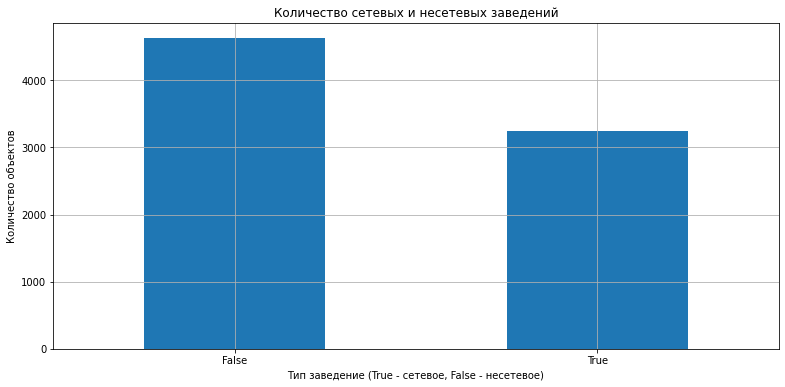

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(13, 6))
# Строим столбчатую диаграмму
df_merged['chain_rest'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Количество сетевых и несетевых заведений'
)

# Настраиваем оформление графика
plt.xlabel('Тип заведение (True - сетевое, False - несетевое)')
plt.ylabel('Количество объектов')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

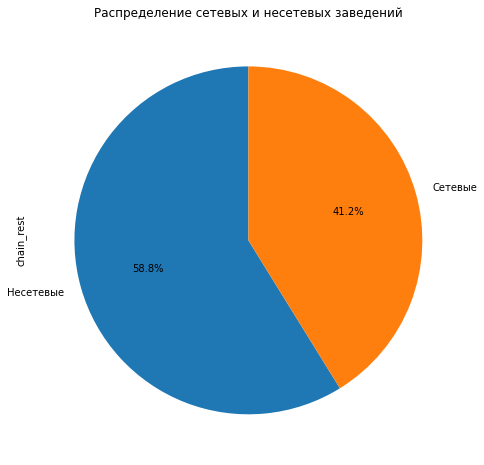

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(8, 8))

df_merged_set = df_merged['chain_rest'].value_counts()
# Строим круговую диаграмму
df_merged_set.plot(
    kind = 'pie',
    labels = ['Несетевые', 'Сетевые'],
    autopct='%1.1f%%',
    startangle=90
)

# Добавляем заголовок
plt.title('Распределение сетевых и несетевых заведений')
# Выводим график
plt.show()

In [ ]:
tab_5 = df_merged['chain_rest'].value_counts()
tab_5_percent = df_merged['chain_rest'].value_counts(normalize=True)*100
tab_5 = pd.DataFrame({'Количество': tab_5, 'Процент': tab_5_percent})
print('Количество сетевых и несетевых заведений')
tab_5

Количество сетевых и несетевых заведений


,Количество,Процент
False,4629,58.818297
True,3241,41.181703


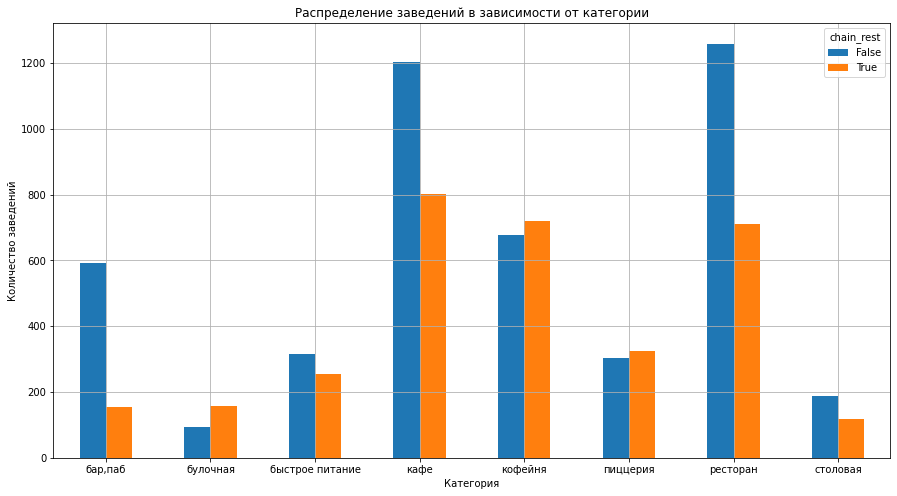

In [ ]:
grouped = df_merged.groupby('category')['chain_rest'].value_counts().unstack(fill_value=0)
grouped.plot(kind='bar',
               title=f'Распределение заведений в зависимости от категории',
               legend=True,
               ylabel='Количество заведений',
               xlabel='Категория',
               rot=0,
               figsize=(15, 8))
plt.grid()

# Выводим график
plt.show()

In [ ]:
tab_4 = df_merged.groupby('category')['chain_rest'].value_counts().unstack(fill_value=0)
tab_4_percent = df_merged.groupby('category')['chain_rest'].value_counts(normalize=True).unstack(fill_value=0) * 100
tab_4_combined = pd.concat([tab_4, tab_4_percent], axis=1, keys=['Количество', 'Процент'])

print('Распределение заведений в зависимости от категории')
tab_4_combined

Распределение заведений в зависимости от категории


Количество          Процент           
chain_rest           False True       False      True 
category                                              
бар,паб                593   154  79.384203  20.615797
булочная                93   156  37.349398  62.650602
быстрое питание        316   254  55.438596  44.561404
кафе                  1202   801  60.009985  39.990015
кофейня                677   721  48.426323  51.573677
пиццерия               302   326  48.089172  51.910828
ресторан              1259   710  63.941087  36.058913
столовая               187   119  61.111111  38.888889

- Несетевые рестораны занимают 41.2% (около 4600), пока сетевые - 58.8% (около 3200)
- Булочная является категорией у которой количество сетевых заведений превосходит количество сетевых на наибольшее значение (около 60)
- Пиццерии и кофейни также являются категориями в которых количество сетевых ресторанов превосходит количество несетевых (примерно на 25 и 50 заведений)

---

### Задача 4

Исследуем количество посадочных мест в заведениях.


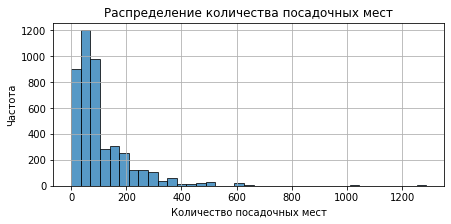

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_merged['seats'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=37, # Устанавливаем количество корзин
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

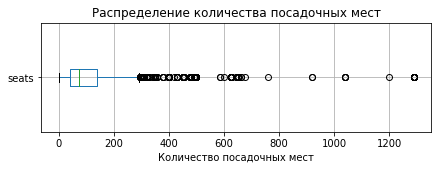

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
df_info.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение количества посадочных мест')
plt.xlabel('Количество посадочных мест')

# Выводим график
plt.show()

- В данных достаточное большое количество выбросов, начиная с 600 посадочных мест
    - Это может быть связано с тем, что существуют заведения, в которых количество посадочных мест может быть очень большим, но лучше всего будет рассмотреть распределение без этой части данных, так как таких заведений слишком маленькое количество, и их нет необходимости анализировать
- В наибольшем количестве заведений количество посадочных мест варьируется от 50 до 100

In [ ]:
unique_values = df_merged['category'].unique()
unique_values

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

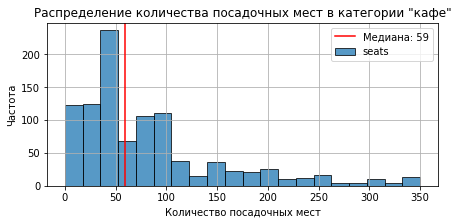

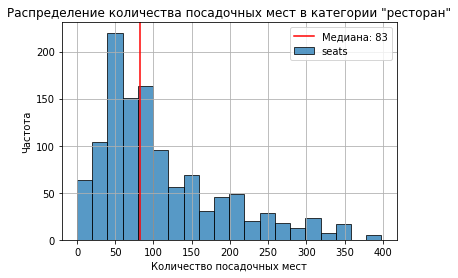

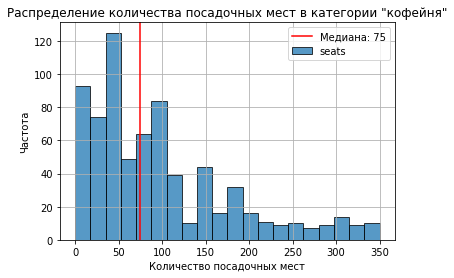

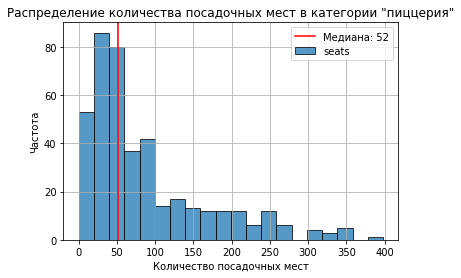

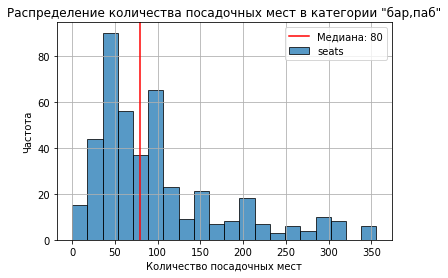

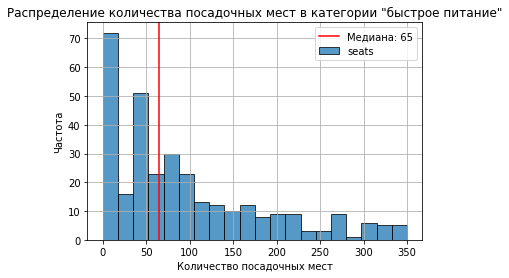

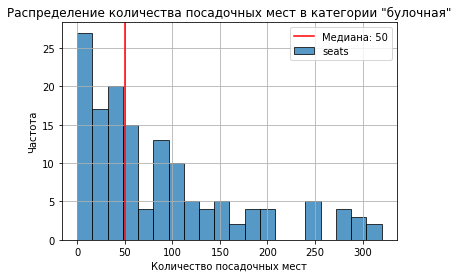

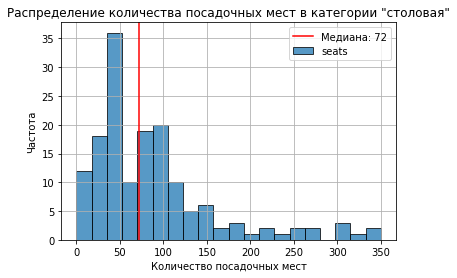

In [ ]:
plt.figure(figsize=(7, 3))

for i in unique_values:
    df_f_s = df_merged.loc[(df_merged['category'] == i) & (df_merged['seats']<400)]
    # Вычисляем медиану
    median_seats = df_f_s['seats'].median()
    # Строим гистограмму
    ax = df_f_s['seats'].plot(
        kind='hist',
        bins=20,
        alpha=0.75,
        edgecolor='black',
        rot=0
    )

    # Добавляем линию медианы на график
    plt.axvline(median_seats, color='red', label=f'Медиана: {median_seats:.0f}')

    # Настраиваем оформление графика
    plt.title(f'Распределение количества посадочных мест в категории "{i}"')
    plt.xlabel('Количество посадочных мест')
    plt.ylabel('Частота')
    plt.legend()

    plt.grid()

    plt.show()


- В категориях `булочная`, `быстрое питание`, `пиццерия`, `кафе` медианное количество посадочных мест вариьируется от 50 до 65
- В категориях `бар,паб`, `кофейня`,`ресторан`, `столовая` медианное количество находится в промежутке от 72 до 83

---

### Задача 5

Исследуем рейтинг заведений.

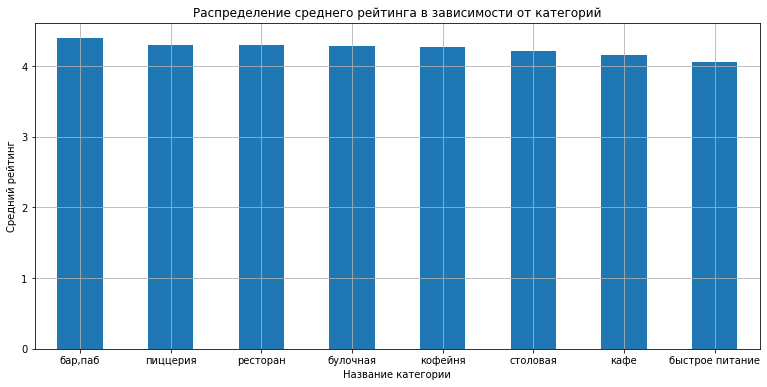

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(13, 6))
df_group_rating = df_merged.groupby('category')['rating'].mean()
# Строим столбчатую диаграмму
df_group_rating.sort_values(ascending = False).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение среднего рейтинга в зависимости от категорий'
)

# Настраиваем оформление графика
plt.xlabel('Название категории')
plt.ylabel('Средний рейтинг')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

In [ ]:
tab_6 = df_merged.groupby('category')['rating'].mean().sort_values(ascending = False)
print('Распределение среднего рейтинга в зависимости от категорий')
tab_6

Распределение среднего рейтинга в зависимости от категорий


category
бар,паб            4.394511
пиццерия           4.301433
ресторан           4.296140
булочная           4.276707
кофейня            4.275036
столовая           4.217320
кафе               4.150325
быстрое питание    4.058947
Name: rating, dtype: float64

- Средние рейтинги практически не отличаются у разных категорий заведений и держится в райное 4.4
- Можно выделить категорию `быстрое питание`, как категорию с самым низким средним рейтингом - 4.05

---

### Задача 6

Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений

interval columns not set, guessing: ['rating', 'seats']


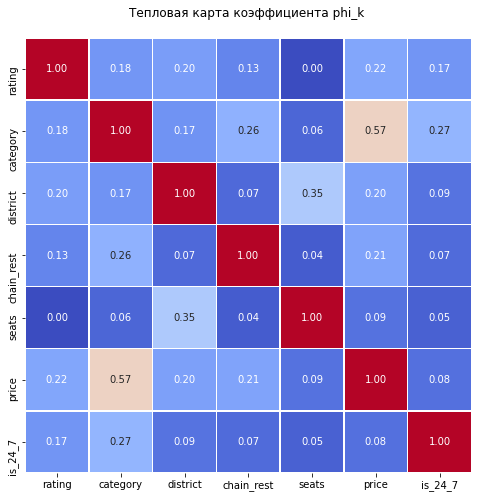

In [ ]:

correlation_matrix = df_merged[['rating', 'category', 'district', 'chain_rest', 'seats', 'price',
                         'is_24_7']].phik_matrix()

# Строим тепловую карту
plt.figure(figsize=(8, 8))

# Сохраняем матрицу корреляции признака churn с другими признаками клиента
data_heatmap = correlation_matrix
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n')

# Выводим график
plt.show()

- В целом рейтинг имеет похожий коэффициент корреляции для всех признаков в районе от 0.13-0.22, за исключением `seats`, который составляет 0
- Все-таки можно выделить два самых высоких коэффициента корреляции `price` - 0.22 , `district` - 0.20

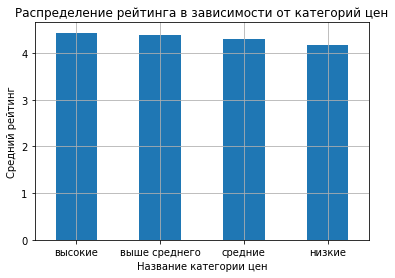

In [ ]:
# Проверим связь между 'rating' и 'price'
df_group_price = df_merged.groupby('price')['rating'].mean()
# Строим столбчатую диаграмму
df_group_price.sort_values(ascending = False).plot(
                kind='bar', # Тип графика - столбчатая диаграмма
                rot=0, # Градус вращения подписи по оси Х
                legend=False, # Выключаем легенду
                title=f'Распределение рейтинга в зависимости от категорий цен'
    )

# Настраиваем оформление графика
plt.xlabel('Название категории цен')
plt.ylabel('Средний рейтинг')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

In [ ]:
tab_7 = df_group_price.sort_values(ascending = False)
print('Распределение рейтинга в зависимости от категорий цен')
tab_7

Распределение рейтинга в зависимости от категорий цен


price
высокие          4.436611
выше среднего    4.386348
средние          4.297727
низкие           4.173077
Name: rating, dtype: float64

- В каждой из категорий ресторанов средний рейтинг находится в промежутке от 4.1 до 4.4
- Можно выделить категорию цен `низкие`, которая имеет самый низкий рейтинг - около 4.1

---

### Задача 7

Найдем топ-15 популярных сетей в Москве. Для них посчитаем значения среднего рейтинга.

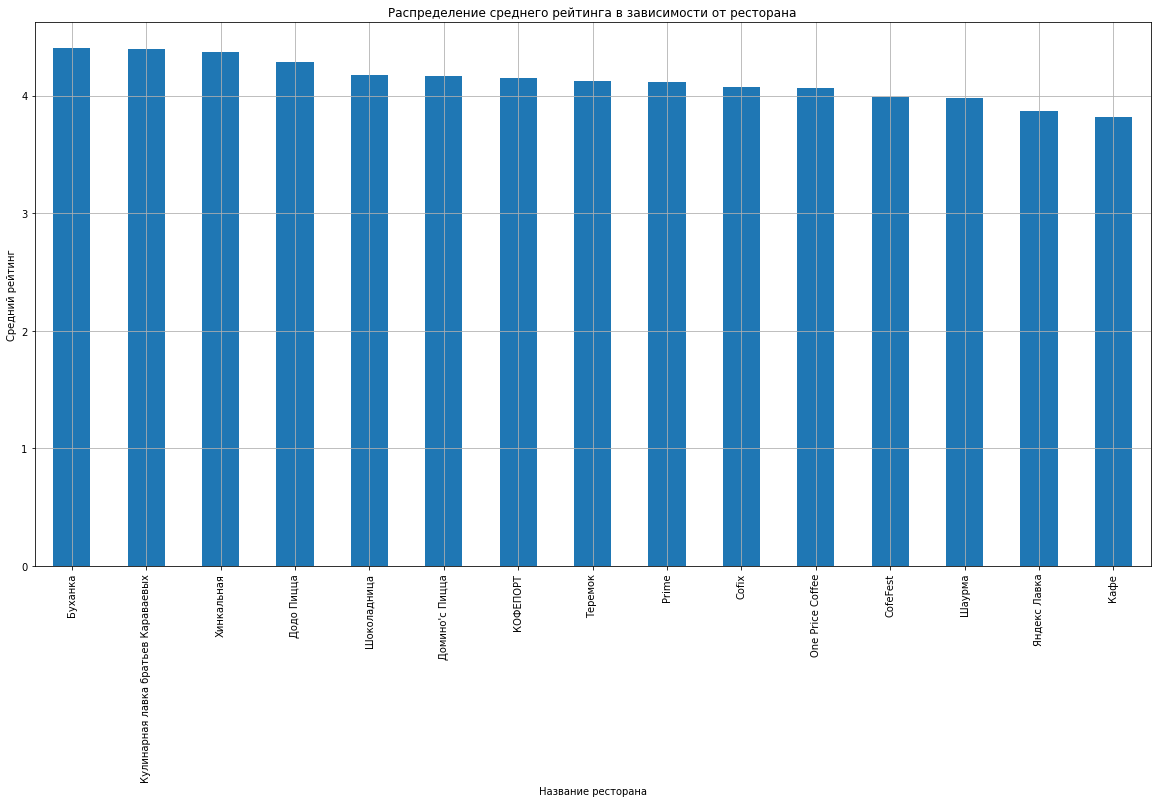

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(20, 10))
df_merged_p = df_merged.loc[df_merged['count'] > 30]
df_group_name = df_merged_p.groupby('name')['rating'].mean()
# Строим столбчатую диаграмму
df_group_name.sort_values(ascending = False).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=90, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение среднего рейтинга в зависимости от ресторана'
)

# Настраиваем оформление графика
plt.xlabel('Название ресторана')
plt.ylabel('Средний рейтинг')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

In [ ]:
tab_8 = df_group_name.sort_values(ascending = False)
print('Распределение среднего рейтинга в зависимости от ресторана')
tab_8

Распределение среднего рейтинга в зависимости от ресторана


name
Буханка                                4.403226
Кулинарная лавка братьев Караваевых    4.394872
Хинкальная                             4.374359
Додо Пицца                             4.286486
Шоколадница                            4.177500
Домино'с Пицца                         4.169737
КОФЕПОРТ                               4.147619
Теремок                                4.123684
Prime                                  4.116000
Cofix                                  4.075385
One Price Coffee                       4.064789
CofeFest                               3.984375
Шаурма                                 3.978788
Яндекс Лавка                           3.870588
Кафе                                   3.817822
Name: rating, dtype: float64

- Средний рейтинг для большинства сетей в Москве варьируется от 4 и выше
- Можно выделить `Кафе`, `Шаурма`, `Яндекс.Лавка`, `CofeFest` как сети с рейтингом ниже 4
- `Буханка`, `Кулинарная лавка братьев Караваевых`, `Хинкальная` сети с самым высоким рейтингом - около 4.4

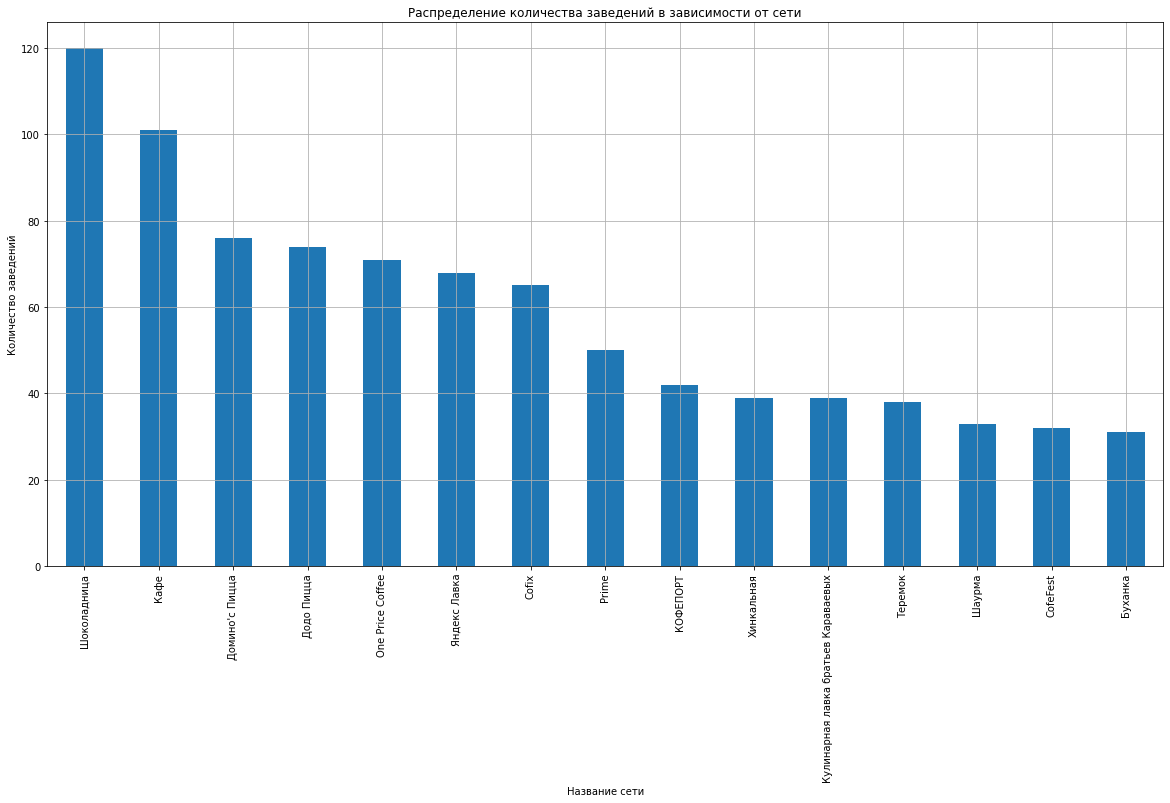

In [ ]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(20, 10))
df_merged_p = df_merged.loc[df_merged['count'] > 30]
# Строим столбчатую диаграмму
df_merged_p['name'].value_counts().plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=90, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение количества заведений в зависимости от сети'
)

# Настраиваем оформление графика
plt.xlabel('Название сети')
plt.ylabel('Количество заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

In [ ]:
tab_9 = df_merged_p['name'].value_counts()
tab_9_percent = df_merged_p['name'].value_counts(normalize=True)*100
tab_9 = pd.DataFrame({'Количество': tab_9, 'Процент': tab_9_percent})
print('Распределение количества заведений в зависимости от сети')
tab_9

Распределение количества заведений в зависимости от сети


,Количество,Процент
Шоколадница,120,13.651877
Кафе,101,11.490330
Домино'с Пицца,76,8.646189
Додо Пицца,74,8.418658
One Price Coffee,71,8.077361
Яндекс Лавка,68,7.736064
Cofix,65,7.394767
Prime,50,5.688282
КОФЕПОРТ,42,4.778157
Хинкальная,39,4.436860


- Лидирующие позиции занимают сеть `Шоколадница` - 120 заведений и `Кафе` - около 100 заведений

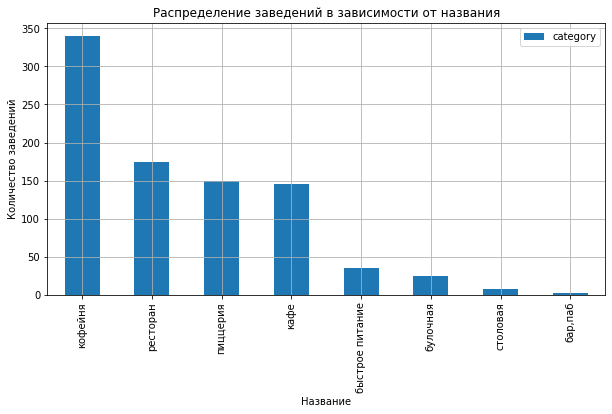

In [ ]:
df_merged_p['category'].value_counts().plot(kind='bar',
               title=f'Распределение заведений в зависимости от названия',
               legend=True,
               ylabel='Количество заведений',
               xlabel='Название',
               rot=90,
               figsize=(10, 5))
plt.grid()

# Выводим график
plt.show()

In [ ]:
tab_10 = df_merged_p['category'].value_counts()
tab_10_percent = df_merged_p['category'].value_counts(normalize=True)*100
tab_10 = pd.DataFrame({'Количество': tab_10, 'Процент': tab_10_percent})
print('Распределение заведений в зависимости от названия')
tab_10

Распределение заведений в зависимости от названия


,Количество,Процент
кофейня,340,38.680319
ресторан,174,19.795222
пиццерия,150,17.064846
кафе,145,16.496018
быстрое питание,35,3.981797
булочная,25,2.844141
столовая,7,0.796359
"бар,паб",3,0.341297


- Категория `кофейня` является самой популярной среди весх категорий - около 340 заведений
- `ресторан`, `пиццерия`, `кафе` имеют количество заведений варьируется от 145 до 175
- Остальные категории имеют меньше 40 заведений

- Топ 3 категории топ-15 заведений Москвы:
    1. Кофейня
    2. Ресторан
    3. Пиццерия
- Топ 3 сети Москвы по рейтингу:
    1. Буханка
    2. Кулинарная лавка братьев Караваевых
    3. Хинкальная
- Топ 3 сети Москвы по количеству:
    1. Шоколадница
    2. Кафе
    3. Домино'с пицца

---

### Задача 8

Изучим вариацию среднего чека заведения в зависимости от района Москвы. Проанализируем цены в Центральном административном округе и других.


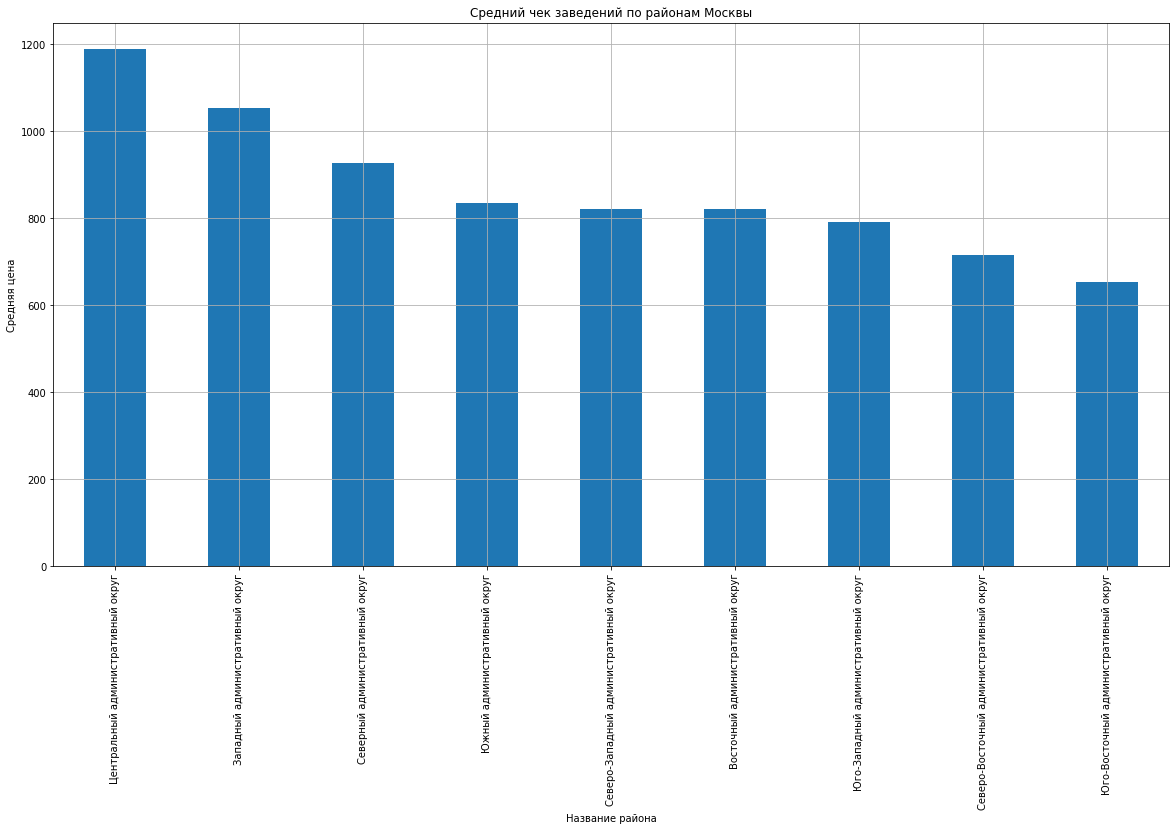

In [ ]:
plt.figure(figsize=(20, 10))

df_merged.groupby('district')['middle_avg_bill'].mean().sort_values(ascending = False).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=90, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Средний чек заведений по районам Москвы'
)

# Настраиваем оформление графика
plt.xlabel('Название района')
plt.ylabel('Средняя цена')
# Добавляем сетку графика
plt.grid()

plt.show()


In [ ]:
tab_11 = df_merged.groupby('district')['middle_avg_bill'].mean().sort_values(ascending = False)
print('Средний чек заведений по районам Москвы')
tab_11

Средний чек заведений по районам Москвы


district
Центральный административный округ         1190.559130
Западный административный округ            1053.072131
Северный административный округ             927.959627
Южный административный округ                836.301282
Северо-Западный административный округ      822.222930
Восточный административный округ            820.626923
Юго-Западный административный округ         792.561702
Северо-Восточный административный округ     716.611296
Юго-Восточный административный округ        654.097938
Name: middle_avg_bill, dtype: float64

- В центральном административном округе средний чек самый высокий и составляет около 1200 рублей
- Чем дальше от центра находится ресторан, тем дешевле в нем блюда занчения изменяются от 1100 до 650

---

### Задача 9
Стоимость чашки кофе в зависимости от расположения заведения.


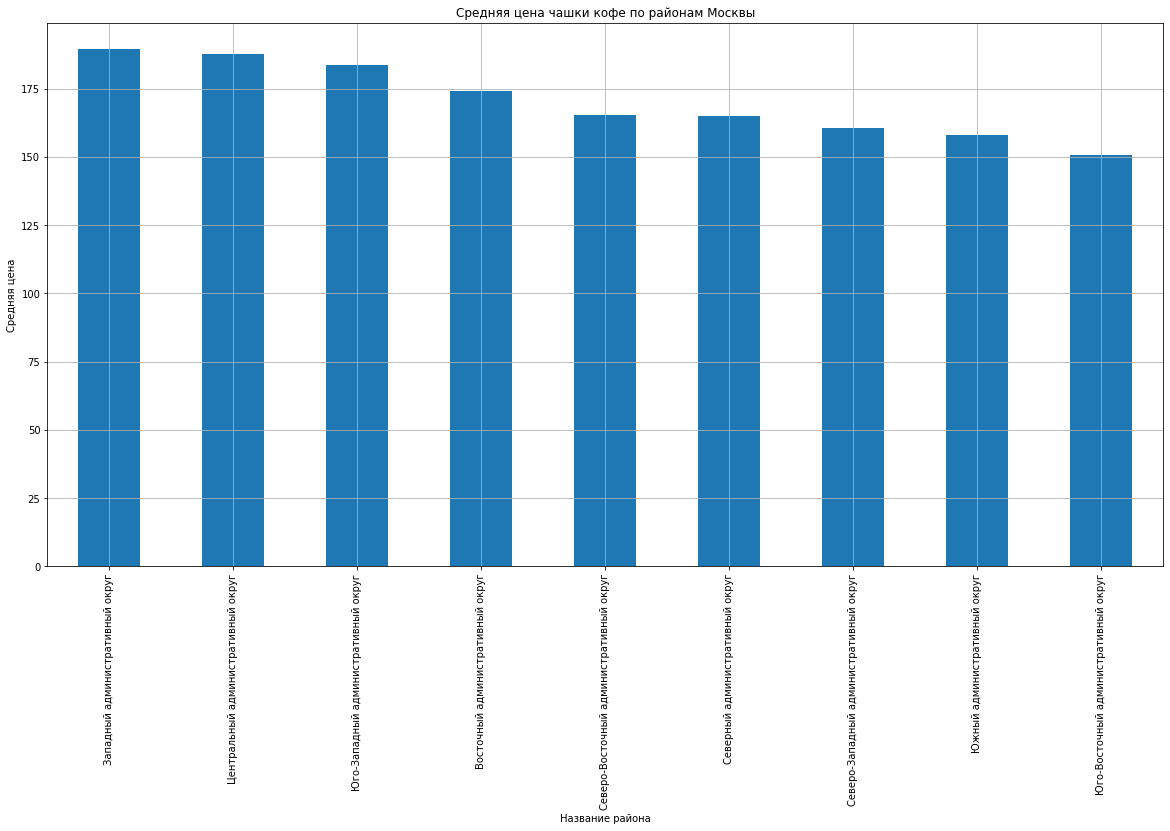

In [ ]:
plt.figure(figsize=(20, 10))

df_merged.groupby('district')['middle_coffee_cup'].mean().sort_values(ascending = False).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=90, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Средняя цена чашки кофе по районам Москвы'
)

# Настраиваем оформление графика
plt.xlabel('Название района')
plt.ylabel('Средняя цена')
# Добавляем сетку графика
plt.grid()

plt.show()

In [ ]:
tab_12 = df_merged.groupby('district')['middle_coffee_cup'].mean().sort_values(ascending = False)
print('Средняя цена чашки кофе по районам Москвы')
tab_12

Средняя цена чашки кофе по районам Москвы


district
Западный административный округ            189.640000
Центральный административный округ         187.624242
Юго-Западный административный округ        183.485714
Восточный административный округ           174.023810
Северо-Восточный административный округ    165.333333
Северный административный округ            165.090909
Северо-Западный административный округ     160.458333
Южный административный округ               157.826087
Юго-Восточный административный округ       150.771429
Name: middle_coffee_cup, dtype: float64

- Лидирующую позицию по цене за чашку кофе занимет Западный административный окург - 190 рублей
- Остальные районы находятся в диапазоне от 150-187
- Цена за чашку кофе не так сильно варьируется как средний чек

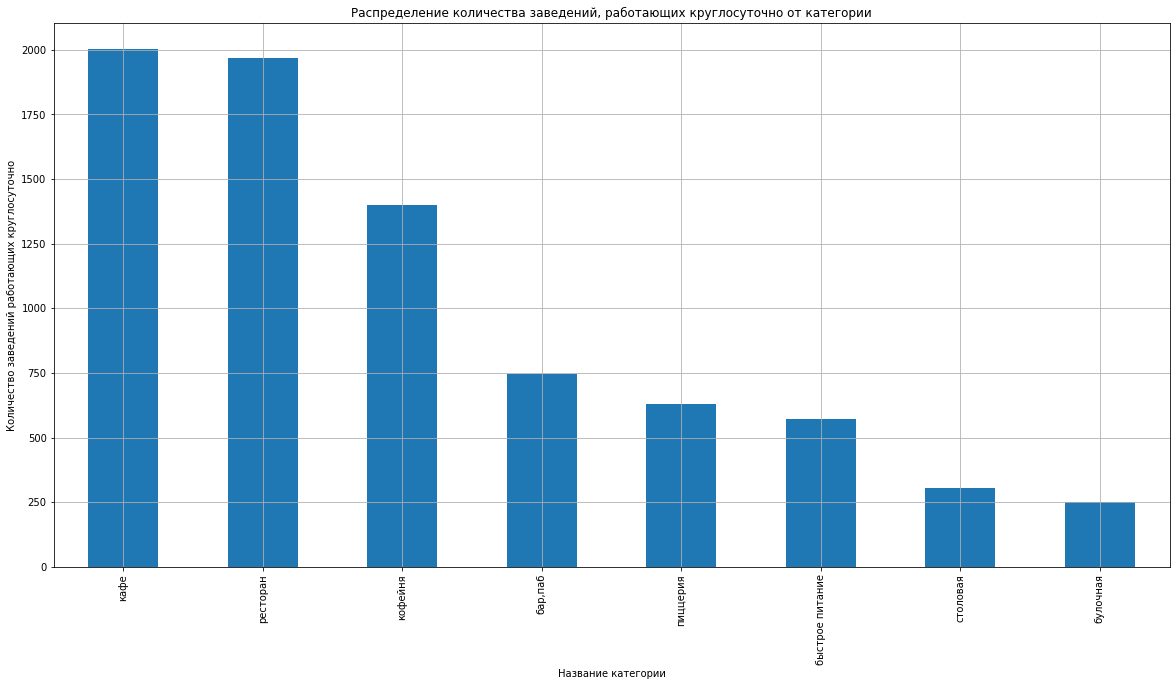

In [ ]:
plt.figure(figsize=(20, 10))

df_merged.groupby('category')['is_24_7'].count().sort_values(ascending = False).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=90, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение количества заведений, работающих круглосуточно от категории'
)

# Настраиваем оформление графика
plt.xlabel('Название категории')
plt.ylabel('Количество заведений работающих круглосуточно')
# Добавляем сетку графика
plt.grid()

plt.show()

In [ ]:
tab_13 = df_merged.groupby('category')['is_24_7'].count().sort_values(ascending = False)
print('Распределение количества заведений, работающих круглосуточно от категории')
tab_13

Распределение количества заведений, работающих круглосуточно от категории


category
кафе               2003
ресторан           1969
кофейня            1398
бар,паб             747
пиццерия            628
быстрое питание     570
столовая            306
булочная            249
Name: is_24_7, dtype: int64

- Самое большое количество заведений, работающих круглосуточно относится к категории кафе и рестораны - около 2000 заведений
- Булочная и столовая являются категориями, в которых самое низкое количество заведений, работающих круглосуточно - около 270

---

### Промежуточный вывод


- Кафе является самой популярной категорией во всей Москве(2000 заведений). А ресторан в центральном районе(около 2250).
- Самый выскоий средний рейтинг принадлежит категории - бар и паб и держится в райное 4.5.
- Количество сетевых заведений меньше, чем несетевых на 17.6 процентов. В свою очередь самые популярные категории сетевых заведений это кофейня, ресторан и пиццерия.
- Самое популярное количество посадочных мест во всех категориях заведений это 60-90
- Рейтинг заведения в основном зависит от категории цены

## 4. Итоговый вывод и рекомендации

В ходе исследования были проанализированы данные общественных заведений Москвы с целью нахождения оптимальных параметров для открытия нового заведения.

Анализ заведений общественного питания в Москве  

Основные выводы  

1. Категории заведений  
- Всего представлено **8 категорий заведений**:  
  - кафе, ресторан, кофейня, пиццерия, бар/паб, быстрое питание, булочная, столовая.  
- **Топ-3 самых популярных категорий**:  
  1. **Кафе** – 2000 заведений  
  2. **Ресторан** – чуть меньше 2000  
  3. **Кофейня** – около 400 заведений  

2. Распределение заведений по районам  
- **Центральный административный округ (ЦАО)** — лидер по количеству заведений (**~2250**).  
- В остальных районах количество заведений примерно одинаковое (**600–800**).  
- **Самый непопулярный район** — **Северо-Западный АО**, около **300 заведений**.  

3. Популярность категорий в ЦАО  
- **Самая популярная категория**: **ресторан** (**400 заведений**).  
- **Самая непопулярная категория**: **булочная** (< 25 заведений).  

4. Сетевые и несетевые заведения  
- **Несетевых заведений** больше, чем сетевых, **на 17.6%** (1400 заведений).  
- В **пиццериях, кофейнях и булочных** количество **сетевых заведений превышает несетевые**.  

5. Посадочные места  
- **Самый популярный диапазон**: **1–150 мест**.  
- Выбросы: **от 250 до 1300 мест**.  
- В **булочных, заведениях быстрого питания, пиццериях, кофейнях, столовых, кафе** чаще всего **до 60 мест**.  
- В **барах, пабах и ресторанах** более популярны **50 и более посадочных мест**.  

6. Рейтинг заведений  
- Средний рейтинг **не сильно различается** для разных типов заведений и находится в диапазоне **4–4.5**.  
- **Самая сильная зависимость рейтинга** – от категории цены (**коэффициент корреляции 0.2**).  

7. Топ заведений Москвы  
**Топ-3 категории среди топ-15 заведений**:  
1. Кофейня  
2. Ресторан  
3. Пиццерия  

**Топ-3 сети Москвы по рейтингу**:  
1. Буханка  
2. Кулинарная лавка братьев Караваевых  
3. Хинкальная  

**Топ-3 сети Москвы по количеству заведений**:  
1. Шоколадница  
2. Кафе  
3. Домино'с пицца  


8. Средний чек  
- В **ЦАО** средний чек **самый высокий** — около **1200 рублей**.  
- Чем дальше от центра, **тем дешевле блюда** – средний чек уменьшается с **1100 до 700 рублей**.  



Рекомендации для бизнеса  

- **Советуем рассмотреть открытие ресторана**, поскольку это одна из самых востребованных категорий заведений (**чуть меньше 2000 заведений**) и она характеризуется высоким средним чеком (**до 1200 рублей в ЦАО**).  

- **Стоит обратить внимание на кофейни и пиццерии**, так как эти категории наиболее распространены среди сетевых заведений (**в пиццериях, кофейнях и булочных сетевых заведений больше, чем несетевых**). Однако в **пиццериях высокая конкуренция**, ведь в этой категории уже представлено значительное количество точек - **около 300**.  

- **Рекомендуем выбирать Центральный административный округ (ЦАО) для открытия заведения**, поскольку здесь самый высокий средний чек (**около 1200 рублей**) и наибольшее количество заведений (**2250**), что подтверждает высокий спрос. Однако высокая конкуренция может усложнить выход на рынок.  

- **Важно учитывать район при формировании ценовой политики**, так как средний чек в заведениях снижается по мере удаления от центра: в ЦАО он достигает **1200 рублей**, а в других районах варьируется от **1100 до 700 рублей**.  
